# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
# pages = 10
# page_size = 100

# reviews = []

# # for i in range(1, pages + 1):
# for i in range(1, pages + 1):

#     print(f"Scraping page {i}")

#     # Create URL to collect links from paginated data
#     url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

#     # Collect HTML data from this page
#     response = requests.get(url)

#     # Parse content
#     content = response.content
#     parsed_content = BeautifulSoup(content, 'html.parser')
#     for para in parsed_content.find_all("div", {"class": "text_content"}):
#         reviews.append(para.get_text())
    
#     print(f"   ---> {len(reviews)} total reviews")
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 15
page_size = 100

reviews = []
title = []
dates = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("h2", {"class": "text_header"}):
        title.append(para.get_text())
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    for para in parsed_content.find_all("time", itemprop="datePublished"):
        dates.append(para.get_text())
    
    print(f"   ---> {len(title)} total titles, {len(reviews)} total reviews, {len(dates)} total dates")

Scraping page 1
   ---> 100 total titles, 100 total reviews, 100 total dates
Scraping page 2
   ---> 200 total titles, 200 total reviews, 200 total dates
Scraping page 3
   ---> 300 total titles, 300 total reviews, 300 total dates
Scraping page 4
   ---> 400 total titles, 400 total reviews, 400 total dates
Scraping page 5
   ---> 500 total titles, 500 total reviews, 500 total dates
Scraping page 6
   ---> 600 total titles, 600 total reviews, 600 total dates
Scraping page 7
   ---> 700 total titles, 700 total reviews, 700 total dates
Scraping page 8
   ---> 800 total titles, 800 total reviews, 800 total dates
Scraping page 9
   ---> 900 total titles, 900 total reviews, 900 total dates
Scraping page 10
   ---> 1000 total titles, 1000 total reviews, 1000 total dates
Scraping page 11
   ---> 1100 total titles, 1100 total reviews, 1100 total dates
Scraping page 12
   ---> 1200 total titles, 1200 total reviews, 1200 total dates
Scraping page 13
   ---> 1300 total titles, 1300 total reviews, 

In [28]:
dataset = {
  'titles': title,
  'reviews': reviews,
  'date': dates
}

df = pd.DataFrame(dataset)
df

,titles,reviews,date
0,"""no great expectations""",✅ Trip Verified | I flew to LHR from ATH in C...,30th January 2024
1,"""actively try and split families up""",✅ Trip Verified | I like the British Airways ...,29th January 2024
2,"""my cabin luggage was taken""",✅ Trip Verified | I have come to boarding and...,28th January 2024
3,“appalling service”,✅ Trip Verified | Stinking nappies being chang...,26th January 2024
4,“Worst service ever”,✅ Trip Verified | Worst service ever. Lost bag...,23rd January 2024
...,...,...,...
1495,"""Slowest baggage drop service """,✅ Verified Review | Athens to London. Slowest...,1st October 2017
1496,"""a service of 2 halves""",✅ Verified Review | A return British Airways ...,29th September 2017
1497,"""now worse than Ryanair""",✅ Verified Review | Geneva to London. British...,29th September 2017
1498,"""used to be a nice airline""",✅ Verified Review | BA used to be a nice airli...,27th September 2017


In [29]:
df.to_csv("data/BA_reviews2.csv")

Now we have dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [30]:
# data = pd.read_csv('data/BA_reviews.csv')
# print(data.head())
# print(data.info())
# print (data.index)
# print(data)
# sns.countplot(data['reviews'])
# plt.show()
df.dropna()
df

,titles,reviews,date
0,"""no great expectations""",✅ Trip Verified | I flew to LHR from ATH in C...,30th January 2024
1,"""actively try and split families up""",✅ Trip Verified | I like the British Airways ...,29th January 2024
2,"""my cabin luggage was taken""",✅ Trip Verified | I have come to boarding and...,28th January 2024
3,“appalling service”,✅ Trip Verified | Stinking nappies being chang...,26th January 2024
4,“Worst service ever”,✅ Trip Verified | Worst service ever. Lost bag...,23rd January 2024
...,...,...,...
1495,"""Slowest baggage drop service """,✅ Verified Review | Athens to London. Slowest...,1st October 2017
1496,"""a service of 2 halves""",✅ Verified Review | A return British Airways ...,29th September 2017
1497,"""now worse than Ryanair""",✅ Verified Review | Geneva to London. British...,29th September 2017
1498,"""used to be a nice airline""",✅ Verified Review | BA used to be a nice airli...,27th September 2017


In [31]:
type(df["reviews"][0])

str

In [32]:
df['titles'] = df['titles'].apply(lambda x: x.replace('"', ''))
df

,titles,reviews,date
0,no great expectations,✅ Trip Verified | I flew to LHR from ATH in C...,30th January 2024
1,actively try and split families up,✅ Trip Verified | I like the British Airways ...,29th January 2024
2,my cabin luggage was taken,✅ Trip Verified | I have come to boarding and...,28th January 2024
3,“appalling service”,✅ Trip Verified | Stinking nappies being chang...,26th January 2024
4,“Worst service ever”,✅ Trip Verified | Worst service ever. Lost bag...,23rd January 2024
...,...,...,...
1495,Slowest baggage drop service,✅ Verified Review | Athens to London. Slowest...,1st October 2017
1496,a service of 2 halves,✅ Verified Review | A return British Airways ...,29th September 2017
1497,now worse than Ryanair,✅ Verified Review | Geneva to London. British...,29th September 2017
1498,used to be a nice airline,✅ Verified Review | BA used to be a nice airli...,27th September 2017


In [33]:
df['flightMonth'] = pd.DatetimeIndex(df['date']).month
df['flightYear'] = pd.DatetimeIndex(df['date']).year
df

,titles,reviews,date,flightMonth,flightYear
0,no great expectations,✅ Trip Verified | I flew to LHR from ATH in C...,30th January 2024,1,2024
1,actively try and split families up,✅ Trip Verified | I like the British Airways ...,29th January 2024,1,2024
2,my cabin luggage was taken,✅ Trip Verified | I have come to boarding and...,28th January 2024,1,2024
3,“appalling service”,✅ Trip Verified | Stinking nappies being chang...,26th January 2024,1,2024
4,“Worst service ever”,✅ Trip Verified | Worst service ever. Lost bag...,23rd January 2024,1,2024
...,...,...,...,...,...
1495,Slowest baggage drop service,✅ Verified Review | Athens to London. Slowest...,1st October 2017,10,2017
1496,a service of 2 halves,✅ Verified Review | A return British Airways ...,29th September 2017,9,2017
1497,now worse than Ryanair,✅ Verified Review | Geneva to London. British...,29th September 2017,9,2017
1498,used to be a nice airline,✅ Verified Review | BA used to be a nice airli...,27th September 2017,9,2017


In [34]:
df.drop('date', axis=1)

,titles,reviews,flightMonth,flightYear
0,no great expectations,✅ Trip Verified | I flew to LHR from ATH in C...,1,2024
1,actively try and split families up,✅ Trip Verified | I like the British Airways ...,1,2024
2,my cabin luggage was taken,✅ Trip Verified | I have come to boarding and...,1,2024
3,“appalling service”,✅ Trip Verified | Stinking nappies being chang...,1,2024
4,“Worst service ever”,✅ Trip Verified | Worst service ever. Lost bag...,1,2024
...,...,...,...,...
1495,Slowest baggage drop service,✅ Verified Review | Athens to London. Slowest...,10,2017
1496,a service of 2 halves,✅ Verified Review | A return British Airways ...,9,2017
1497,now worse than Ryanair,✅ Verified Review | Geneva to London. British...,9,2017
1498,used to be a nice airline,✅ Verified Review | BA used to be a nice airli...,9,2017


In [35]:
df.to_csv("data/Clean_BA_reviews.csv")

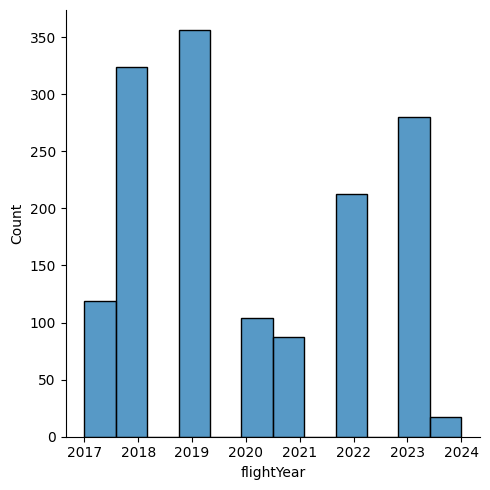

In [36]:
sns.displot(df, x="flightYear")

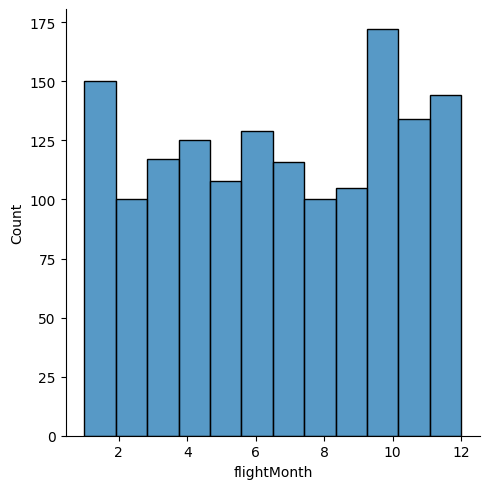

In [37]:
sns.displot(df, x="flightMonth")

In [42]:

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim
import pyLDAvis.gensim

ModuleNotFoundError: No module named 'stop_words'